# Students Performance in Exams
## by Sara Mohammad El-Begermy

About the dataset:  
Marks scored by the students in high school students from the United States. The [dataset](https://www.kaggle.com/spscientist/students-performance-in-exams) is 72.04 kB. 

## Table of Contents
- [Get Started](#Intro)


- [Univariate Exploration](#Univariate)       
  1. [Gender](#Gender)
  2. [Race](#Race)
  3. [Parental Level of Education](#Parents)
  4. [Lunch](#Lunch)
  5. [Test Preparation Course](#Course)
  6. [Scores](#Scores)
  
  
- [Bivariate Exploration](##Bivariate)
  1. [Gender vs Race](#GvR)
  2. [Gender vs Parental Education](#GvP)
  3. [Gender vs Lunch](#GvL)
  4. [Gender vs Test Preparation Course](#GvC)
  5. [Gender vs Mathematics Score](#GvM)
  6. [Gender vs Reading Score](#GvRe)
  7. [Gender vs Writing Score](#GvW)
  8. [Gender vs Total Score](#GvT)
  9. [Race vs Parental Level of Education](#RvP)
  10. [Race vs Lunch](#RvL)
  11. [Race vs Test Preparation Course](#RvC)
  12. [Race vs Mathematics Score](#RvM)
  13. [Race vs Reading Score](#RvRe)
  14. [Race vs Writing Score](#RvW)
  15. [Race vs Total Score](#RvT)
  16. [Parental Level of Education vs Lunch](#PvL)
  17. [Parental Level of Education vs Test Preparation Course](#PvC)
  18. [Parental Level of Education vs Mathematics Score](#PvM)
  19. [Parental Level of Education vs Reading Score](#PvRe)
  20. [Parental Level of Education vs Writing Score](#PvW)
  21. [Parental Level of Education vs Total Score](#PvT)
  22. [Lunch vs Test Preparation Course](#LvC)
  23. [Lunch vs Scores](#LvS)
  24. [Test Preparation Course vs Scores](#CvS)
  25. [Pair Scores](#PS)
  
  
- [Multivariate Exploration](#Multivariate)
  1. [Maths vs Reading vs Writing scores](#MReW)
  2. [All in One!!](#All) 🙃


- [References](#References)

<a id='Intro'></a>
## Get Started

In [20]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

In [21]:
data = pd.read_csv('StudentsPerformance.csv')
data.shape

(1000, 8)

### What is the structure of your dataset?

> 1000 rows and 8 columns


In [22]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [23]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [24]:
data.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

The data is clean!!

In [25]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

Make Total Score!

In [26]:
data['total percentage'] = (data['math score']+data['reading score']+data['writing score'])/3
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


Order Parental Level of Education for later comparisons!

In [27]:
order_education=["some high school", "high school", "some college", "associate's degree", "bachelor's degree", "master's degree"]
data['parental level of education'] = pd.Categorical(data['parental level of education'], order_education, ordered=True)

Order race/ethnicity by name for more beautiful visualization!

In [28]:
race_order = np.sort(data['race/ethnicity'].unique())
data['race/ethnicity'] = pd.Categorical(data['race/ethnicity'], race_order, ordered=True)

<a id='Univariate'></a>
## Univariate Exploration

<a id='Gender'></a>
### Gender

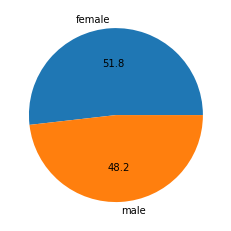

In [29]:
plt.pie(x=data['gender'].value_counts(), labels=data['gender'].unique(), autopct='%.1f');

<a id='Race'></a>
### Race

Make it one color.   
Sort it according to the group name.

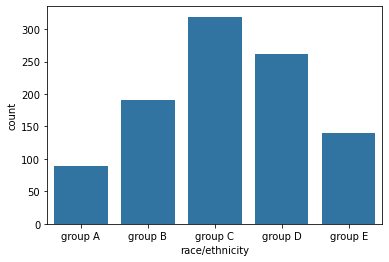

In [30]:
sb.countplot(data=data, x=data['race/ethnicity'], color=sb.color_palette()[0]);

Sort it according to the count of each race!

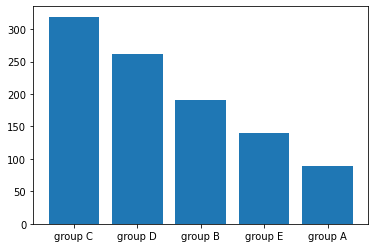

In [31]:
plt.bar(data['race/ethnicity'].value_counts().index, data['race/ethnicity'].value_counts());
#another method: 
#sb.countplot(data=data, x=data['race/ethnicity'], color=sb.color_palette()[0], order=data['race/ethnicity'].value_counts().index);

<a id='Parents'></a>
### Parental Level of Education

Sort according to parental level of education.<br>

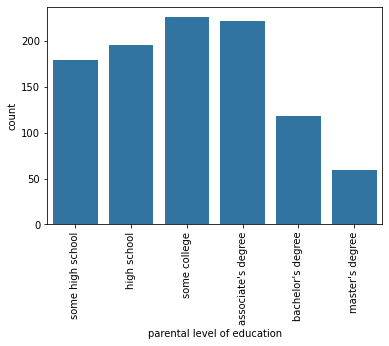

In [32]:
sb.countplot(data=data, x=data['parental level of education'], color=sb.color_palette()[0]); #sorted because it is converted to Categorical above
plt.xticks(rotation=90); 

<a id='Lunch'></a>
### Lunch

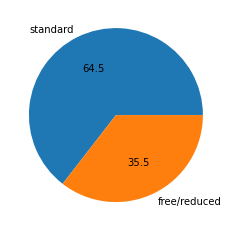

In [33]:
plt.pie(x=data['lunch'].value_counts(), labels=data['lunch'].unique(), autopct='%.1f');

<a id='Course'></a>
### Test Preparation Course

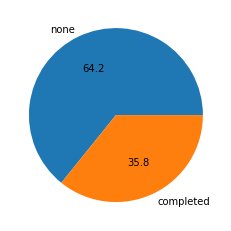

In [34]:
plt.pie(x=data['test preparation course'].value_counts(), labels=data['test preparation course'].unique(), autopct='%.1f');

<a id='Scores'></a>
### Scores

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

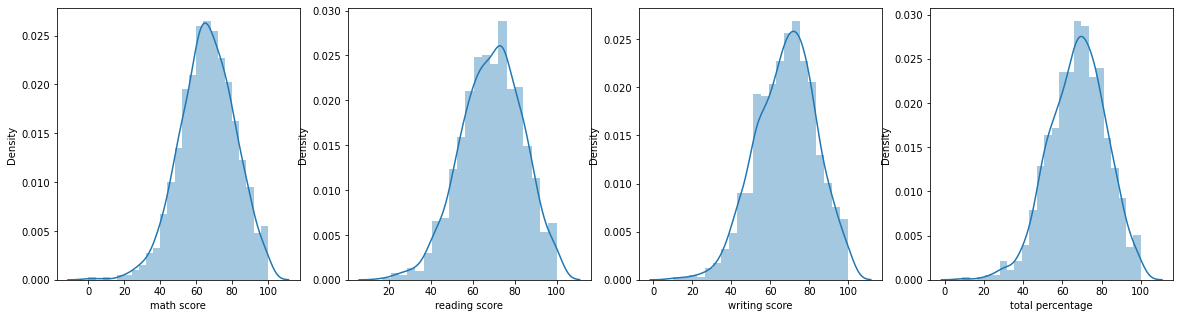

In [35]:
#put 4 plots here to easitly compare
plt.figure(figsize=[20,5])
#plt.subplots(sharex=True, sharey=True)
plt.subplot(1,4,1)#1 row, 4 columns, position 1
sb.distplot(data['math score']);#kde=True by default

plt.subplot(1,4,2)
sb.distplot(data['reading score']);

plt.subplot(1,4,3)
sb.distplot(data['writing score']);

plt.subplot(1,4,4)
sb.distplot(data['total percentage']);

In [36]:
plt.close()#save your memory

To what extent do the scores follow normal Distribution?

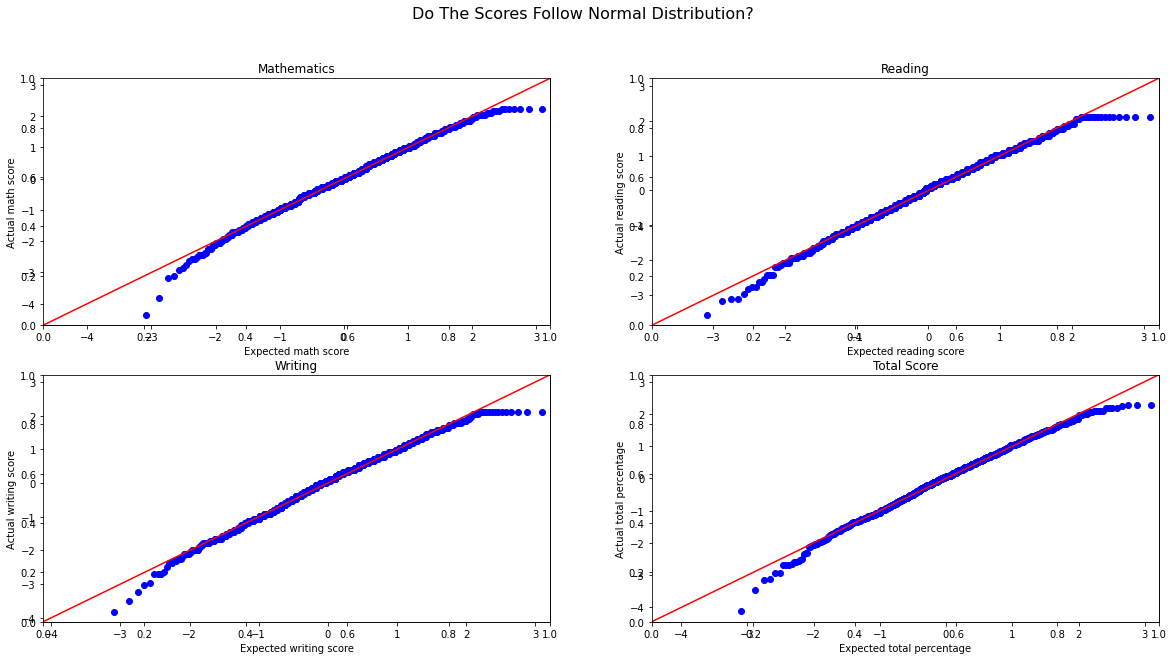

In [37]:
#put 4 plots here to easily compare
fig, ax = plt.subplots(2, 2, figsize=(20, 10));
ax = ax.flatten();

fig.suptitle('Do The Scores Follow Normal Distribution?', fontsize=16);

ax[0] = fig.add_subplot(2,2,1);#2 rows, 2 columns, position (1,1)
sm.qqplot(data['math score'], fit=True, line='45', ax=ax[0]);
ax[0].set_xlabel('Expected math score');
ax[0].set_ylabel('Actual math score');
ax[0].set_title('Mathematics');

ax[1] = fig.add_subplot(2,2,2);
sm.qqplot(data['reading score'], fit=True, line='45', ax=ax[1]);
ax[1].set_xlabel('Expected reading score');
ax[1].set_ylabel('Actual reading score');
ax[1].set_title('Reading');

ax[2] = fig.add_subplot(2,2,3);
sm.qqplot(data['writing score'], fit=True, line='45', ax=ax[2]);
ax[2].set_xlabel('Expected writing score');
ax[2].set_ylabel('Actual writing score');
ax[2].set_title('Writing');

ax[3] = fig.add_subplot(2,2,4);
sm.qqplot(data['total percentage'], fit=True, line='45', ax=ax[3]);
ax[3].set_xlabel('Expected total percentage');
ax[3].set_ylabel('Actual total percentage');
remove_output = ax[3].set_title('Total Score');


All scores are similar to normal distribution but not fitting 100%

In [38]:
plt.close() #save memory

<a id='Bivariate'></a>
## Bivariate Exploration

<a id='GvR'></a>
### Gender vs Race

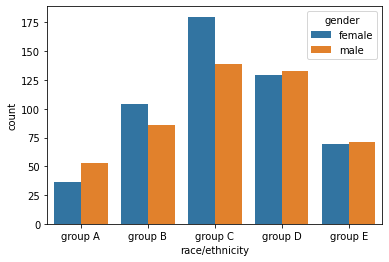

In [39]:
sb.countplot(data=data, x='race/ethnicity', hue='gender', order=np.sort(data['race/ethnicity'].value_counts().index));

<a id='GvP'></a>
### Gender vs Parental Education

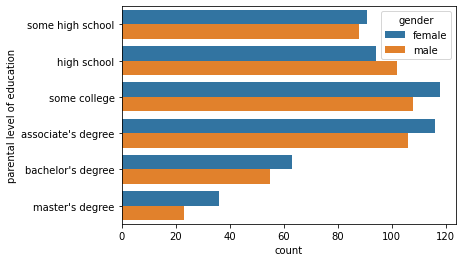

In [40]:
sb.countplot(data=data, y='parental level of education', hue='gender');

<a id='GvL'></a>
### Gender vs Lunch

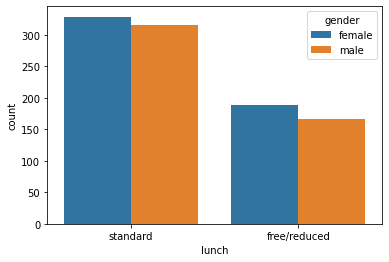

In [41]:
sb.countplot(data=data, x='lunch', hue='gender');

<a id='GvC'></a>
### Gender vs Test Preparation Course

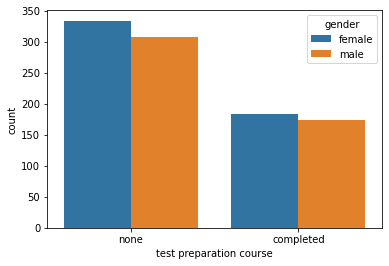

In [42]:
sb.countplot(data=data, x='test preparation course', hue='gender');

<a id='GvM'></a>
### Gender vs Mathematics Score

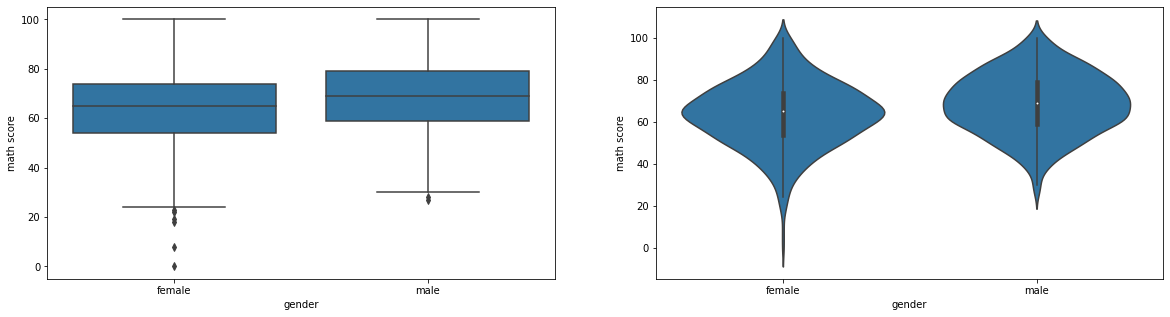

In [43]:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
sb.boxplot(data=data, x='gender', y='math score', color=sb.color_palette()[0]);
plt.subplot(1,2,2)
sb.violinplot(data=data, x='gender', y='math score', color=sb.color_palette()[0]);

In [44]:
plt.close()

In average, males are better in mathematics.   
Females are more diverse in their scores and they have more far outliers.

<a id='GvRe'></a>
### Gender vs Reading Score

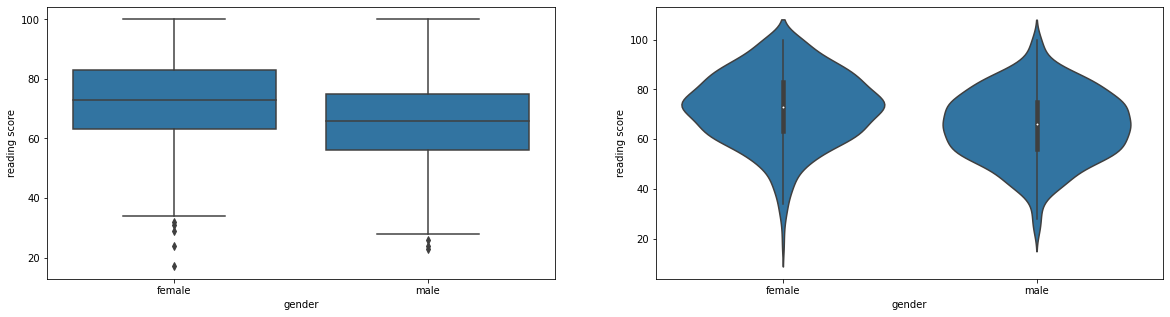

In [45]:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
sb.boxplot(data=data, x='gender', y='reading score', color=sb.color_palette()[0]);
plt.subplot(1,2,2)
sb.violinplot(data=data, x='gender', y='reading score', color=sb.color_palette()[0]);

In [46]:
plt.close()

<a id='GvW'></a>
### Gender vs Writing Score

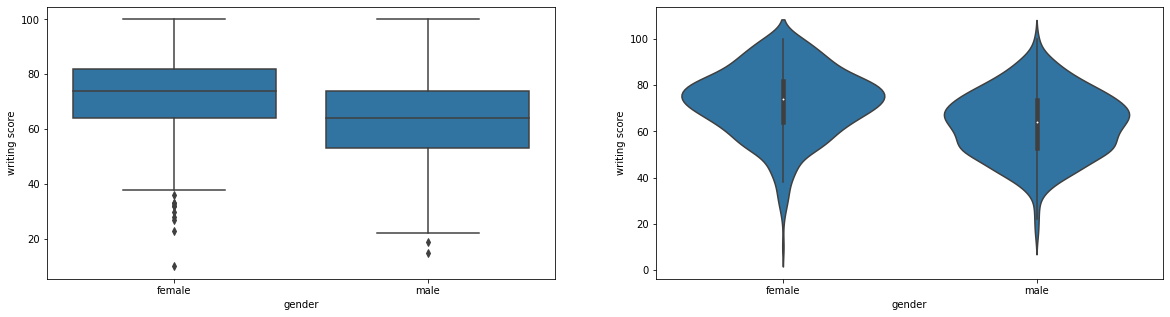

In [47]:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
sb.boxplot(data=data, x='gender', y='writing score', color=sb.color_palette()[0]);
plt.subplot(1,2,2)
sb.violinplot(data=data, x='gender', y='writing score', color=sb.color_palette()[0]);

In [48]:
plt.close()

In average, males are better in mathematics while females are better in language skills (reading and writing).     
Females are more diverse in their scores and they have more far outliers.

<a id='GvT'></a>
### Gender vs Total Score

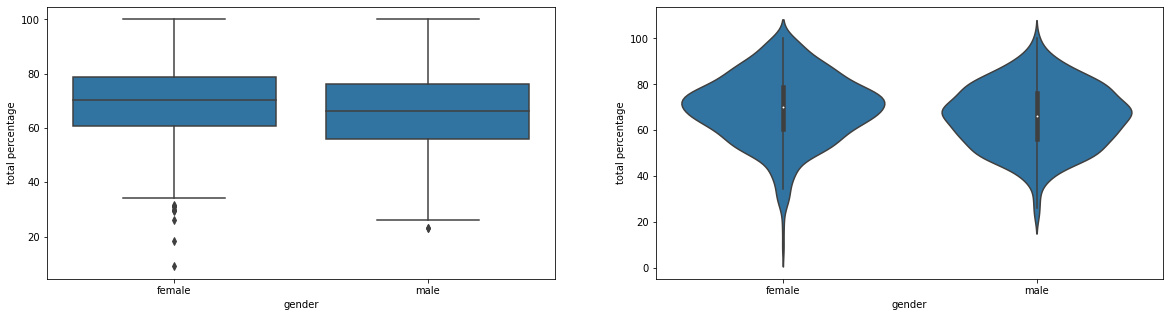

In [49]:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
sb.boxplot(data=data, x='gender', y='total percentage', color=sb.color_palette()[0]);
plt.subplot(1,2,2)
sb.violinplot(data=data, x='gender', y='total percentage', color=sb.color_palette()[0]);

In [50]:
plt.close()

In average, females are better total score as they exceed in both writing and reading but subseed in mathematics.     
Females are more diverse in their scores and they have more far outliers.

<a id='RvP'></a>
### Race vs Parental Level of Education

In [51]:
sub_data = data[['race/ethnicity', 'parental level of education']]
pivot_count = sub_data.pivot_table(index=data['parental level of education'], columns=sub_data['race/ethnicity'], aggfunc='count')
pivot_count
#This should be polished by:
#the value should be proportional to the race count

parental level of education                  \
race/ethnicity                                  group A group B group C   
parental level of education                                               
some high school                                     24      38      49   
high school                                          18      48      64   
some college                                         18      37      69   
associate's degree                                   14      41      78   
bachelor's degree                                    12      20      40   
master's degree                                       3       6      19   

                                             
race/ethnicity              group D group E  
parental level of education                  
some high school                 50      18  
high school                      44      22  
some college                     67      35  
associate's degree               50      39  
bachelor's degree                28      18  
master's degree                  23       8

In [52]:
#for trying purposes only:
#pivot_.columns
#pivot_.columns.names
#pivot_.columns[0][1]
#pivot_.index
#len(pivot_.columns)
#pivot_[('parental level of education', 'group A')][1]
#len(data[(data['race/ethnicity']==pivot_.columns[0][1])])

In [53]:
pivot_adapted = pivot_count.copy()
for i, column in enumerate(pivot_count.columns):
    for j in range(len(pivot_count.index)):
        #print(pivot_[column][j])
        #print(len(data[(data['race/ethnicity']==pivot_.columns[0][1])]))
        pivot_adapted[column][j]=pivot_count[column][j]*100/len(data[(data['race/ethnicity']==pivot_count.columns[i][1])])
pivot_adapted

parental level of education                  \
race/ethnicity                                  group A group B group C   
parental level of education                                               
some high school                                     26      20      15   
high school                                          20      25      20   
some college                                         20      19      21   
associate's degree                                   15      21      24   
bachelor's degree                                    13      10      12   
master's degree                                       3       3       5   

                                             
race/ethnicity              group D group E  
parental level of education                  
some high school                 19      12  
high school                      16      15  
some college                     25      25  
associate's degree               19      27  
bachelor's degree                10      12  
master's degree                   8       5

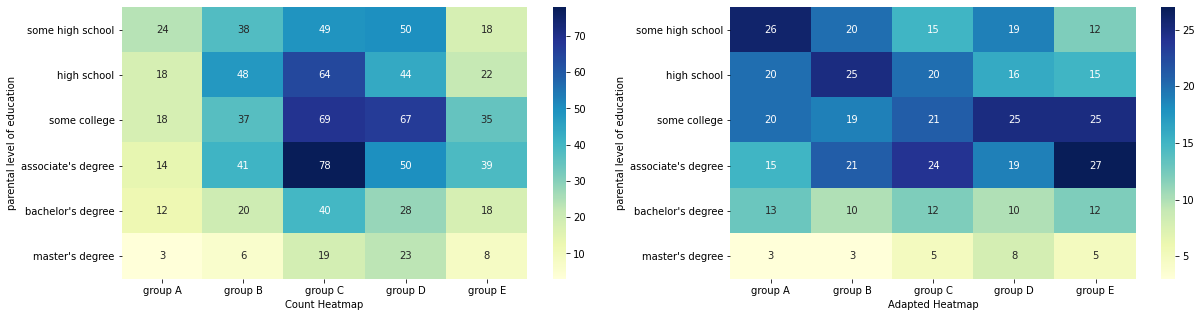

In [54]:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
sb.heatmap(data=pivot_count, cmap="YlGnBu", xticklabels=np.sort(data['race/ethnicity'].unique()), annot=True);
plt.xlabel('Count Heatmap');

plt.subplot(1,2,2)
sb.heatmap(data=pivot_adapted, cmap="YlGnBu", xticklabels=np.sort(data['race/ethnicity'].unique()), annot=True);
plt.xlabel('Adapted Heatmap');

In the Adapted Heatmap, each column should add up to 100%, however, this may not happen due to rounding ratios. They would add up to a little bit less than 100.   
So, approximately quarter of group A population parents have 'some high school'.   
Approximately quarter of group B population parents have 'high school'.    
Approximately quarter of group C population parents have 'associate's degree'.    
Approximately quarter of group D population parents have 'some colledge'.      
Approximately quarter of group E population parents have 'associate's'.  
Therefore, **group E's parents are the most educated if we considered the population of each group.**


<a id='RvL'></a>
### Race vs Lunch

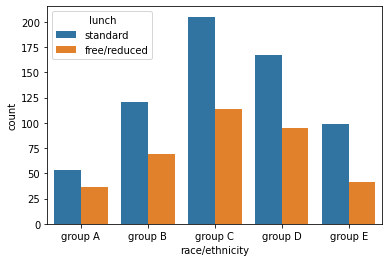

In [55]:
sb.countplot(data=data, x='race/ethnicity', hue='lunch');#, order=np.sort(data['race/ethnicity'].value_counts().index));

<a id='RvC'></a>
### Race vs Test Preparation Course

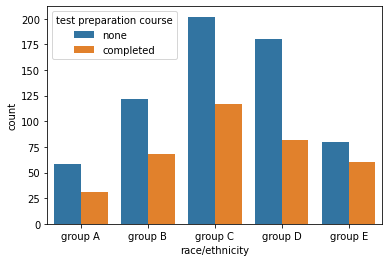

In [56]:
sb.countplot(data=data, x='race/ethnicity', hue='test preparation course');#, order=np.sort(data['race/ethnicity'].value_counts().index));

<a id='RvM'></a>
### Race vs Mathematics Score

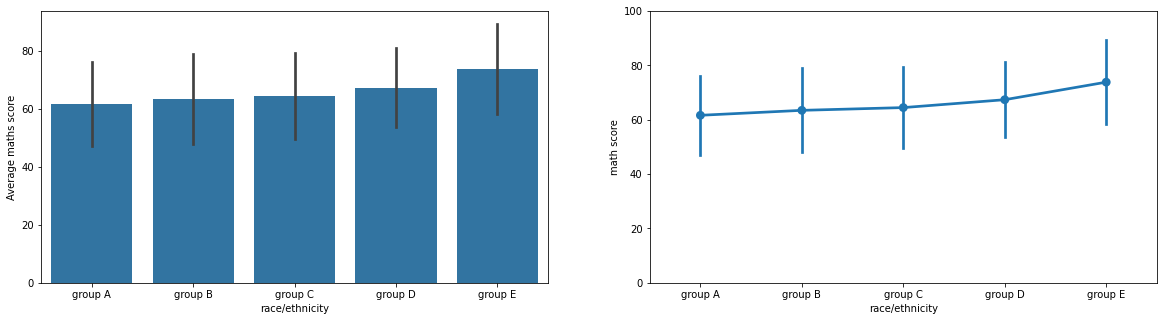

In [57]:
fig = plt.figure(figsize=[20,5])
ax1 = fig.add_subplot(1,2,1)
sb.barplot(data=data, x='race/ethnicity', y='math score', color=sb.color_palette()[0], ci='sd', ax=ax1);#, order=race_order);
ax1.set_ylabel("Average maths score")

ax2 = fig.add_subplot(1,2,2)
sb.pointplot(data=data, x='race/ethnicity', y='math score', color=sb.color_palette()[0], ci='sd', ax=ax2);#, order=race_order);
#make this begin from 0 to avoid deceipt
ax2.set_ylim(0,100);

In [58]:
plt.close()

<a id='RvRe'></a>
### Race vs Reading Score

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 29.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 20.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


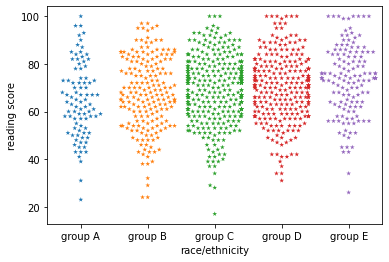

In [59]:
sb.swarmplot(data=data, x='race/ethnicity', y='reading score', marker='*');

<a id='RvW'></a>
### Race vs Writing Score

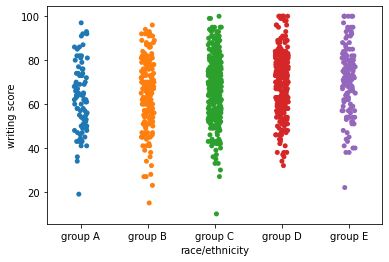

In [60]:
sb.stripplot(data=data, x='race/ethnicity', y='writing score');

<a id='RvT'></a>
### Race vs Total Score

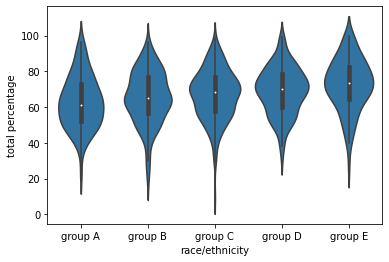

In [61]:
sb.violinplot(data=data, x='race/ethnicity', y='total percentage', color=sb.color_palette()[0]);

<a id='PvL'></a>
### Parental Level of Education vs Lunch 

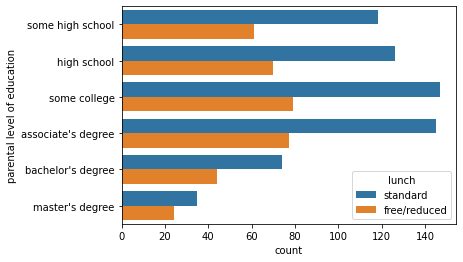

In [62]:
sb.countplot(data=data, y='parental level of education', hue='lunch');

<a id='PvC'></a>
### Parental Level of Education vs Test Preparation Course

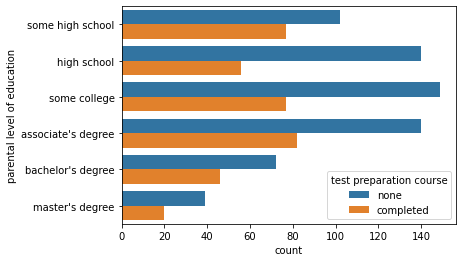

In [63]:
sb.countplot(data=data, y='parental level of education', hue='test preparation course');

<a id='PvM'></a>
### Parental Level of Education vs Mathematics Score

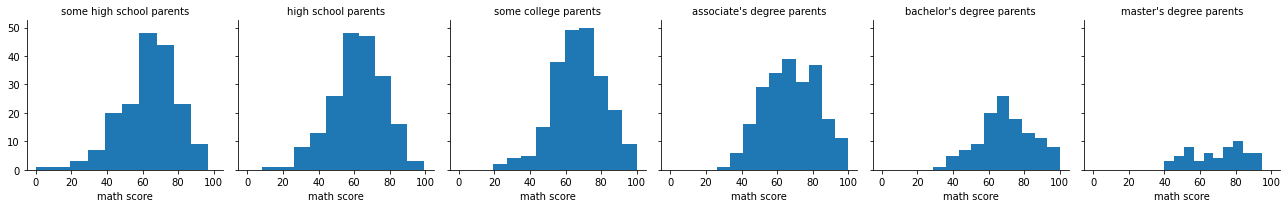

In [64]:
fg = sb.FacetGrid(data=data, col='parental level of education');#, col_order=['some high school', 'high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"]);
fg.map(plt.hist, 'math score');
fg.set_titles(col_template="{col_name} parents");

The minimum math score increases as the education level of parents increases

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


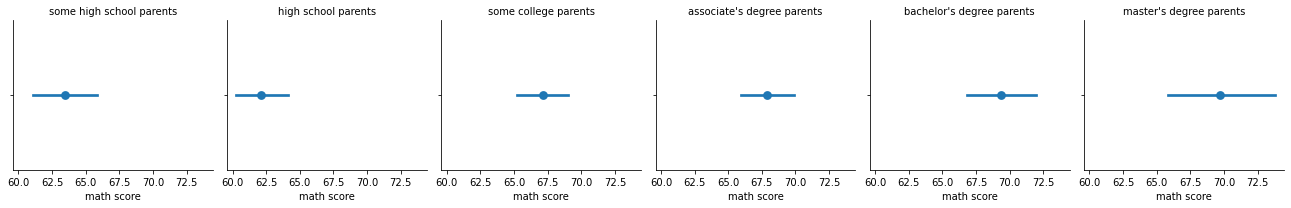

In [65]:
fg = sb.FacetGrid(data=data, col='parental level of education');#, col_order=['some high school', 'high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"]);
fg.map(sb.pointplot, 'math score');#, ci='sd');
fg.set_titles(col_template="{col_name} parents");


Parents education affects students' maths score

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


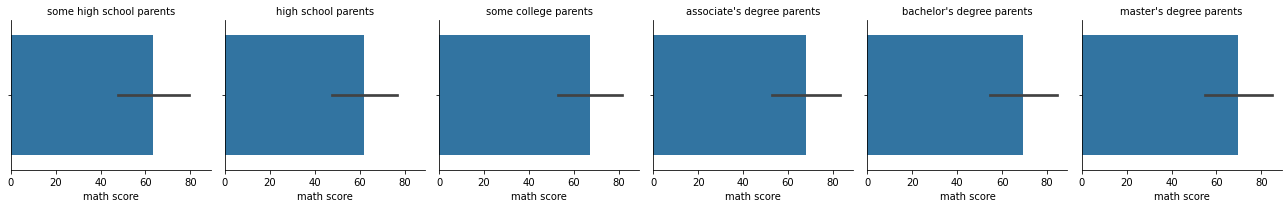

In [66]:
fg = sb.FacetGrid(data=data, col='parental level of education');#, col_order=['some high school', 'high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"]);
fg.map(sb.barplot, 'math score', ci='sd');
fg.set_titles(col_template="{col_name} parents");

Average maths scores are very close to each other regardless of the level of education of parents

 <a id='PvRe'></a>
 ### Parental Level of Education vs Reading Score

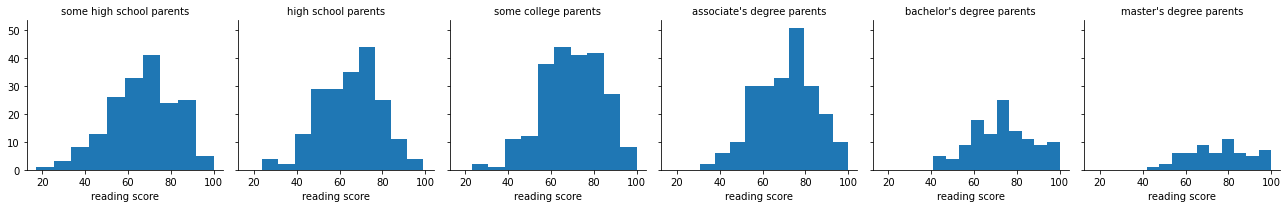

In [67]:
fg = sb.FacetGrid(data=data, col='parental level of education');
fg.map(plt.hist, 'reading score');
fg.set_titles(col_template="{col_name} parents");

The minimum reading score increases as the education level of parents increases.

<a id='PvW'></a>
 ### Parental Level of Education vs Writing Score

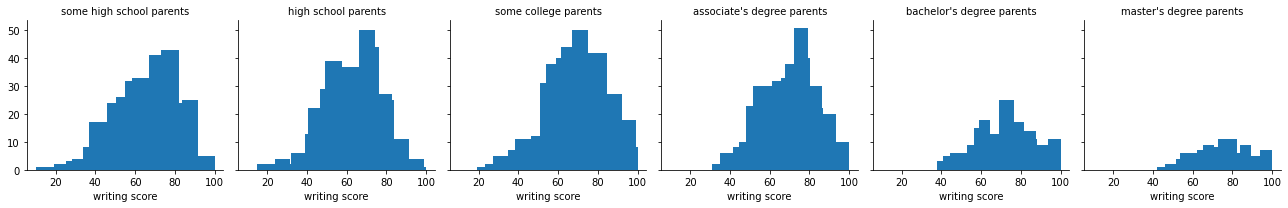

In [68]:
fg.map(plt.hist, 'writing score');
fg.set_titles(col_template="{col_name} parents");

The minimum writing score increases as the education level of parents increases

 <a id='PvT'></a>
 ### Parental Level of Education vs Total Score

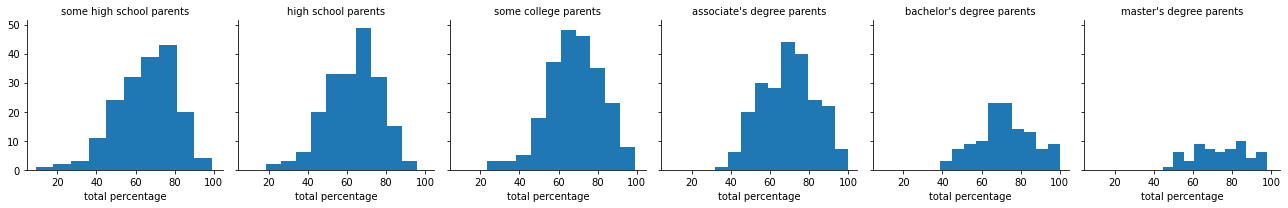

In [69]:
fg = sb.FacetGrid(data=data, col='parental level of education');
fg.map(plt.hist, 'total percentage');
fg.set_titles(col_template="{col_name} parents");

The minimum total score increases as the education level of parents increases

<a id='LvC'></a>
### Lunch vs Test Preparation Course

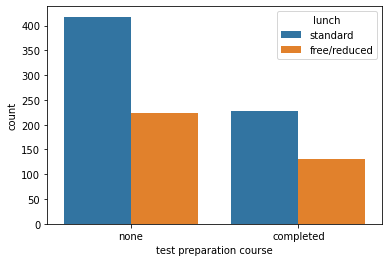

In [70]:
sb.countplot(data=data, x='test preparation course', hue='lunch');

<a id='LvS'></a>
### Lunch vs Scores

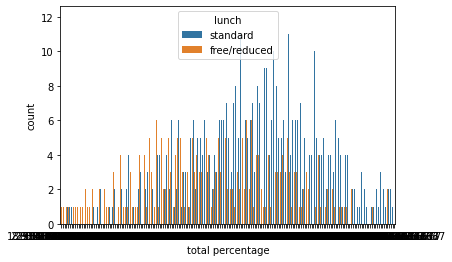

In [71]:
sb.countplot(data=data, x='total percentage', hue='lunch');

Total percentages of pupils who took standard meal (blue) are higher.

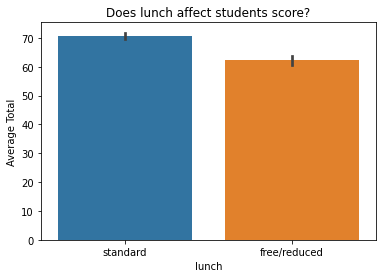

In [72]:
sb.barplot(data=data, y='total percentage', x='lunch'); #estimator = mean by default
plt.ylabel('Average Total');
plt.title('Does lunch affect students score?');

<a id='CvS'></a>
### Test Preparation Course vs Scores

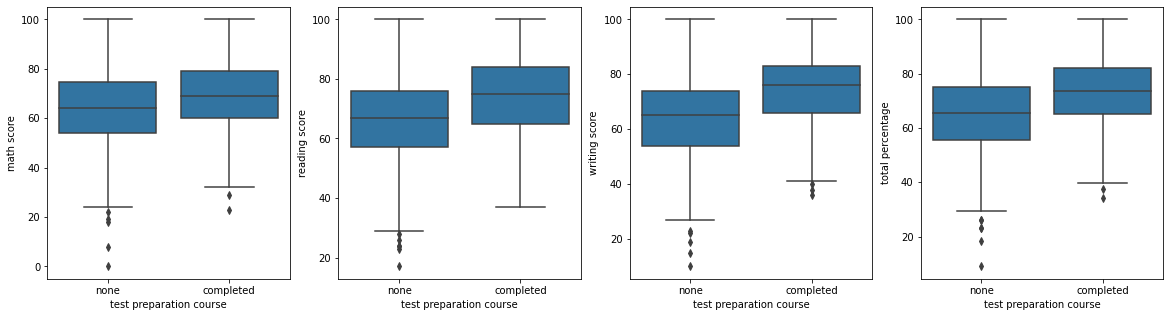

In [73]:
plt.figure(figsize=[20,5])
plt.subplot(1,4,1)
sb.boxplot(data=data, x='test preparation course', y='math score', color=sb.color_palette()[0]);

plt.subplot(1,4,2)
sb.boxplot(data=data, x='test preparation course', y='reading score', color=sb.color_palette()[0]);

plt.subplot(1,4,3)
sb.boxplot(data=data, x='test preparation course', y='writing score', color=sb.color_palette()[0]);

plt.subplot(1,4,4)
sb.boxplot(data=data, x='test preparation course', y='total percentage', color=sb.color_palette()[0]);

In [74]:
plt.close()

The test preparation course affected the the results of the students positively in all subjects in the dataset.

<a id='PS'></a>
### Pair Scores 

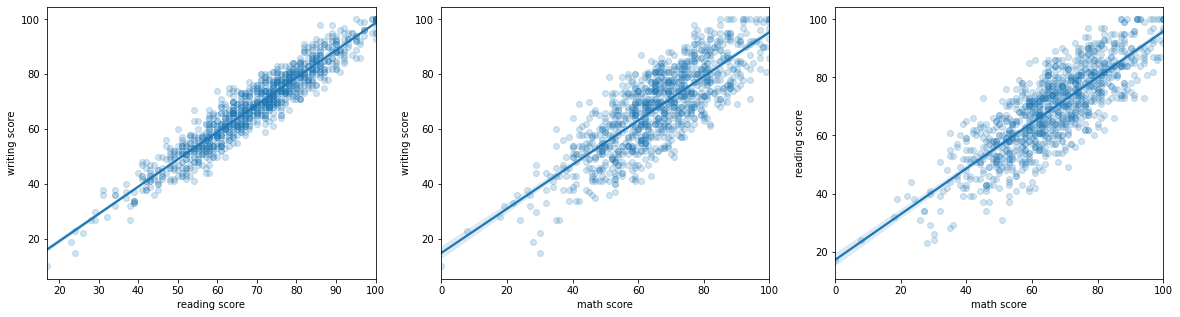

In [75]:
plt.figure(figsize=[20,5])
plt.subplot(1,3,1)#1 row, 3 columns, position 1
sb.regplot(data=data, x=data['reading score'] ,y=data['writing score'], scatter_kws={'alpha':0.2});
plt.subplot(1,3,2)#1 row, 3 columns, position 2
sb.regplot(data=data, x=data['math score'] ,y=data['writing score'], scatter_kws={'alpha':0.2});
plt.subplot(1,3,3)#1 row, 3 columns, position 3
sb.regplot(data=data, x=data['math score'] ,y=data['reading score'], scatter_kws={'alpha':0.2});

In [76]:
plt.close()

From the above plots, we conclude that, although there are strong positive correlations between maths and reading scores and maths and writing scores, still these correlations are less strong than that between reading and writing scores. And this makes sense since reading and writing are both language skills, different of mathematics skills.

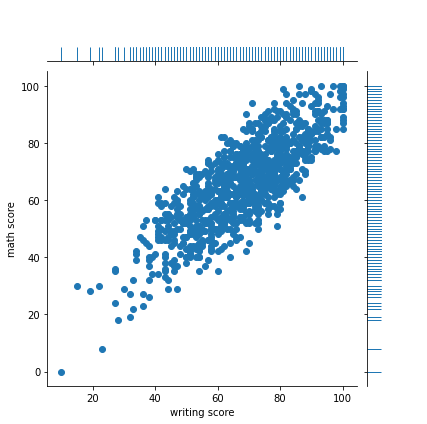

In [77]:
#just trying the rug and strip plot
g = sb.JointGrid(data=data, x='writing score', y = 'math score')
g.plot_joint(plt.scatter)
g.plot_marginals(sb.rugplot, height = 0.25);

<a id='Multivariate'></a>
## Multivariate Exploration

<a id='MReW'></a>
### Mathematis vs Reading vs Writing scores

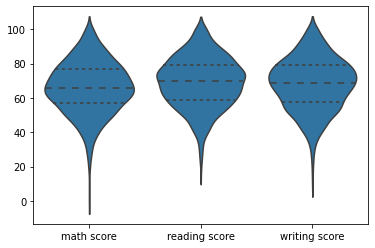

In [78]:
sb.violinplot(data=data[['math score','reading score', 'writing score']], color=sb.color_palette()[0], inner='quartile');

As shown, reading and writing scores are similar to each other, maths scores are bit less than them.

<a id='All'></a>
### All in one!!🙃

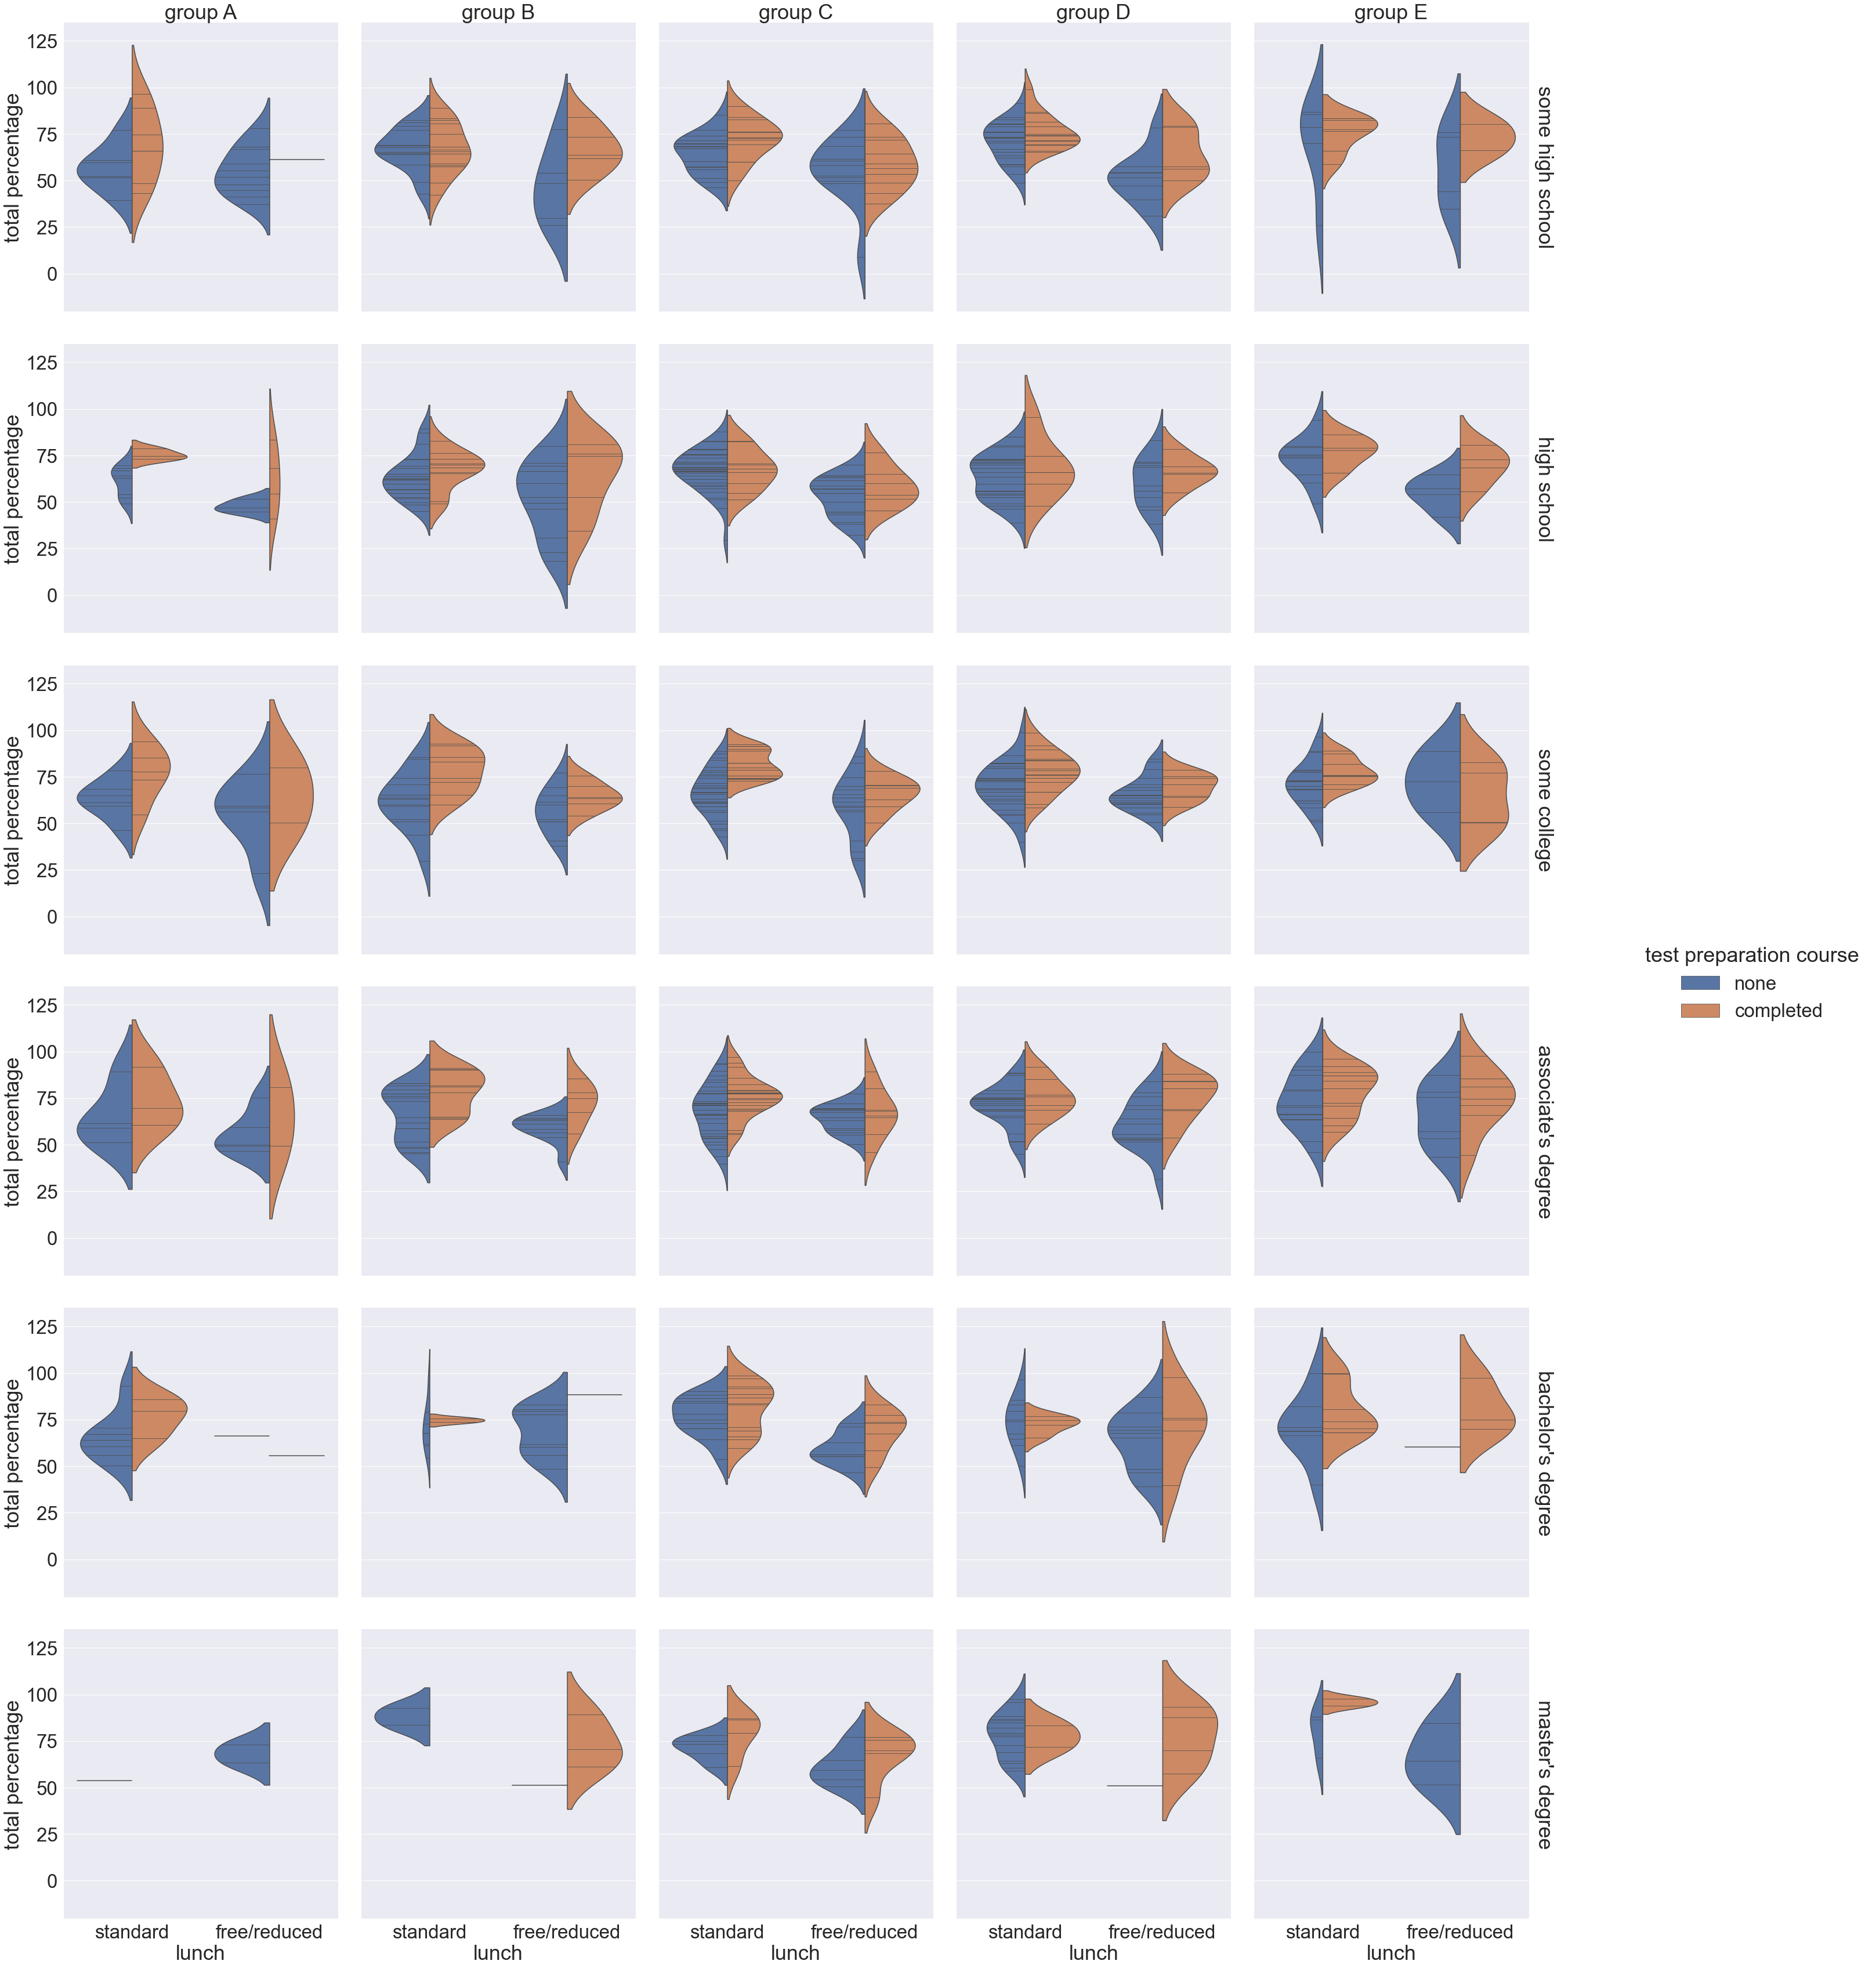

In [79]:
sb.set(style="darkgrid", font_scale=3)
g = sb.catplot(data=data, y='total percentage' , x='lunch', hue='test preparation course', col='race/ethnicity', row='parental level of education', kind="violin", inner="stick", split=True, height=8, sharex=True, sharey=True, margin_titles=True);
g.set_titles(col_template="{col_name}", row_template="{row_name}");
g.tight_layout()

Another style I like too!

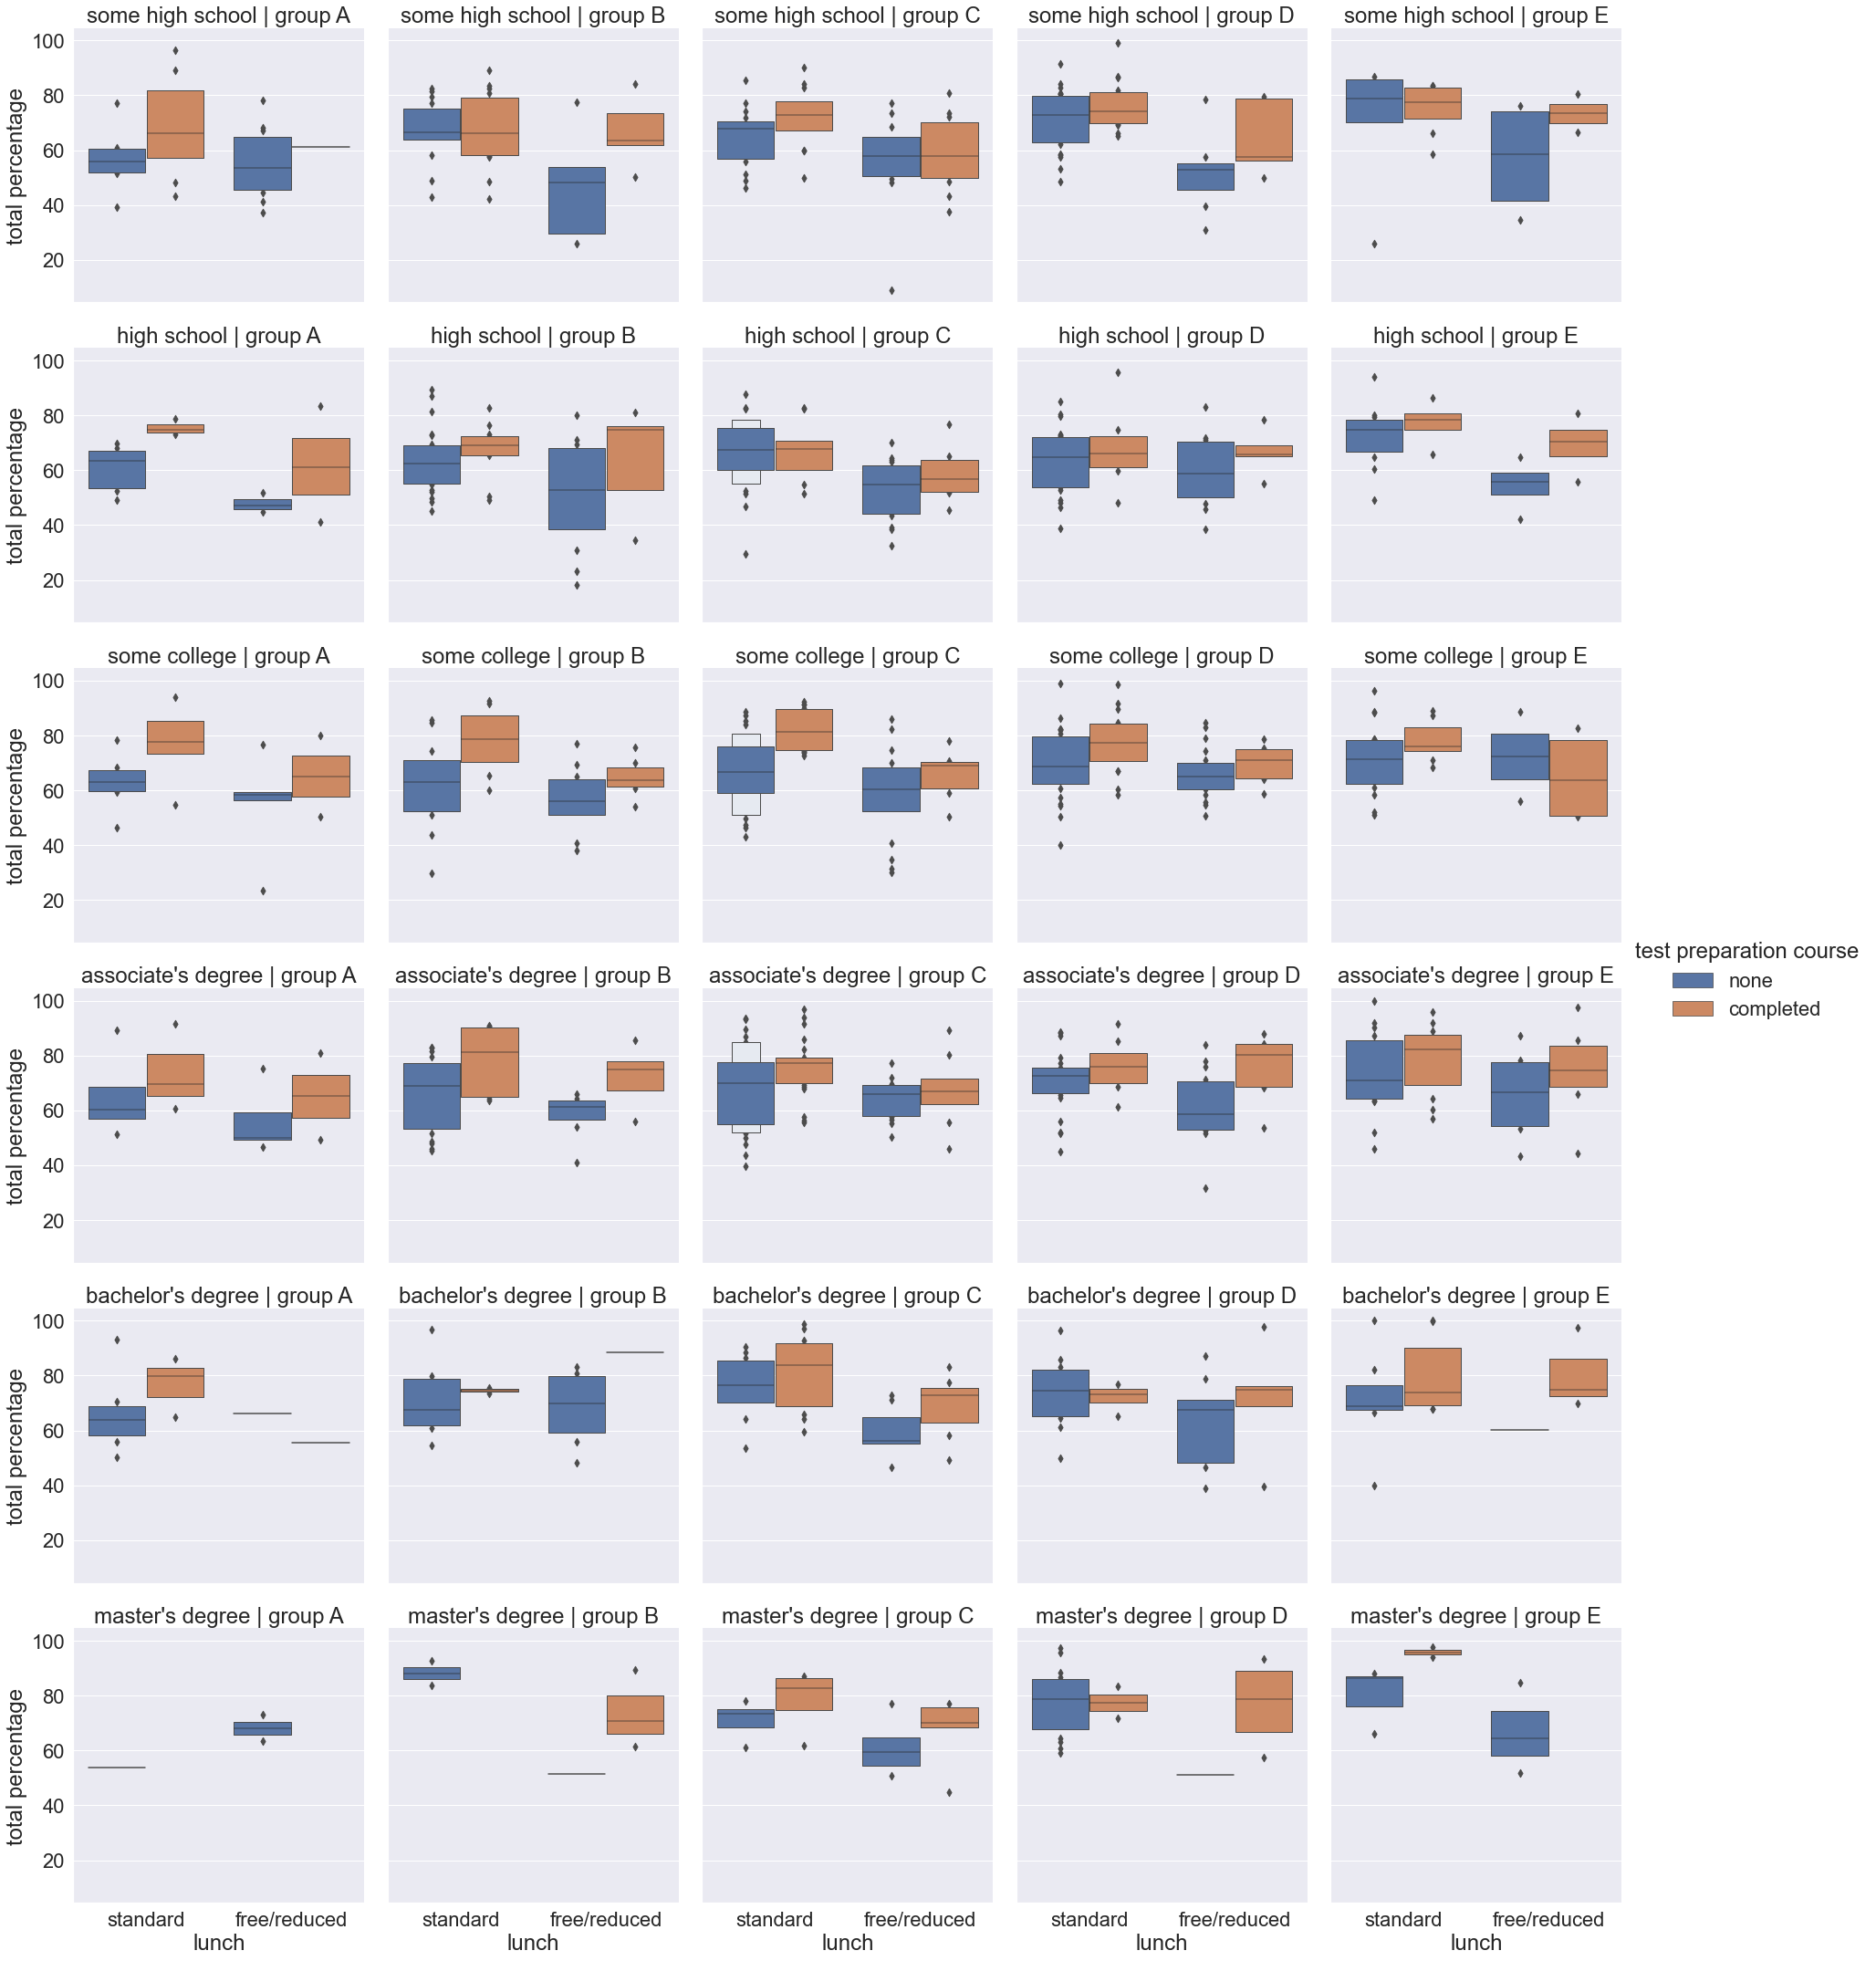

In [80]:
sb.set(style="darkgrid", font_scale=2)
g = sb.catplot(data=data, y='total percentage' , x='lunch', hue='test preparation course', col='race/ethnicity', row='parental level of education', kind="boxen");
g.set_titles(col_template="{col_name}", row_template="{row_name}");

<a id='References'></a>
## References

1. seaborn documentation.
2. matplotlib documentation.
3. Q-Q plots: https://www.youtube.com/watch?v=X9_ISJ0YpGw     
4. swarm plots: https://www.youtube.com/watch?v=5e9NBhGBVwk    
5. strip plot: https://www.youtube.com/watch?v=zhUyC3tPVQQ   
6. axes: https://www.youtube.com/watch?v=D8rwqYcVvmM   
7. catplot: https://www.youtube.com/watch?v=nBL6zEE6r-Q    